In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [55]:
# Look at datatypes of columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


<AxesSubplot:>

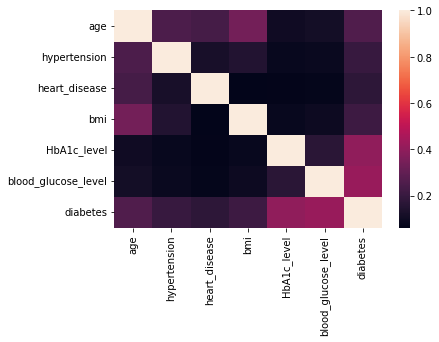

In [56]:

sns.heatmap(df.corr())

In [57]:
# Look at unique values in gender column
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [58]:
# Remove rows that has gender as Other
df = df.drop(df[df['gender'] == 'Other'].index)

In [59]:
# Look at unique values in smoking_history column
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [60]:
# Remove rows that has gender as Other
df = df.drop(df[df['smoking_history'] == 'No Info'].index)

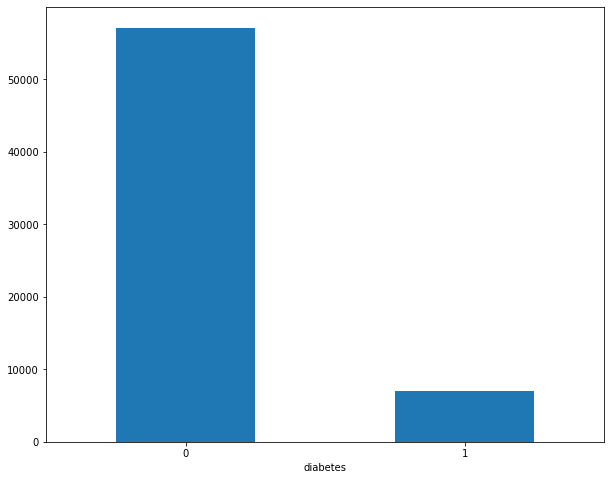

In [61]:
diabetes_bar_df = df.groupby('diabetes')['age'].count()
diabetes_bar_df= diabetes_bar_df.sort_values(ascending=False)


bar_plot = diabetes_bar_df.plot.bar(diabetes_bar_df, rot=0, figsize=(10, 8))


<AxesSubplot:ylabel='gender'>

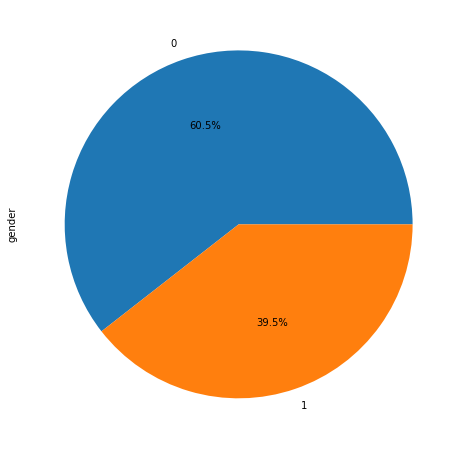

In [78]:
fig, ax = plt.subplots(figsize=(10,8))

gender_df = df['gender'].value_counts()
gender_df.plot(kind="pie", autopct="%.1f%%")

<AxesSubplot:xlabel='smoking_history'>

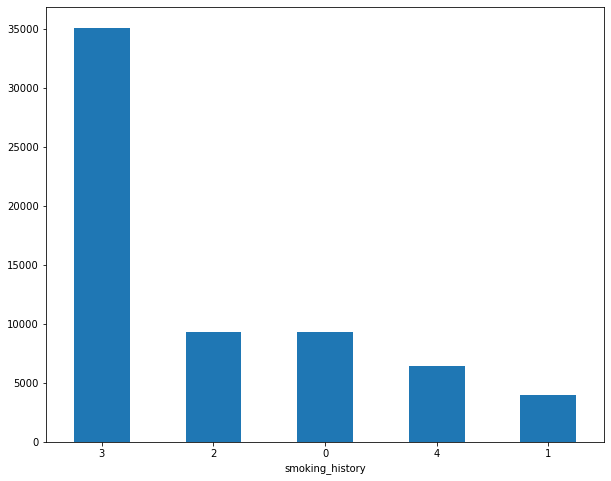

In [77]:
smoking_his_df = df.groupby('smoking_history')['smoking_history'].count()
smoking_his_df = smoking_his_df.sort_values(ascending=False)


smoking_his_df.plot.bar(smoking_his_df, rot=0, figsize=(10, 8))


In [64]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0


In [65]:
# Encode the columns with categorical data
from sklearn.preprocessing import LabelEncoder

columns = ['gender', 'smoking_history']
label = LabelEncoder()

for column in columns:
    df[column] =  label.fit_transform(df[column])
    
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,3,25.19,6.6,140,0
2,1,28.0,0,0,3,27.32,5.7,158,0
3,0,36.0,0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,0,20.14,4.8,155,0
5,0,20.0,0,0,3,27.32,6.6,85,0


In [66]:
# Isolate the target column from the feature column
X = df.drop('diabetes', axis=1)
y = df['diabetes']


# Split data into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
y_pred = log.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
from sklearn.metrics import r2_score, confusion_matrix
r2_score(y_test, y_pred)

0.398128050639436

In [69]:
log.score(X_test, y_test)

0.9418776782236074

In [70]:
confusion_matrix(y_test, y_pred)


array([[11224,   221],
       [  525,   865]], dtype=int64)

<AxesSubplot:>

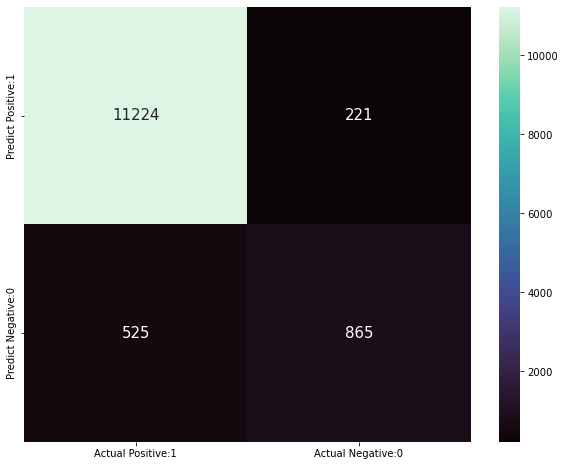

In [79]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm_matrix, annot=True, fmt='d',
            cmap='mako', annot_kws={'size': 15})
